<a href="https://colab.research.google.com/github/Octavio1200/EstadosFinancierosBMV-BIVA/blob/master/Practica_Banxico_y_EDA_API_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Econometría Financiera***

## **Descarga de Banxico, EDA**

### German Martinez Cruz


**Contenido**

* Descarga de Banxico
  * Importación de Librerías
  * Descarga de datos
  * Dataframe


* Análisis Exploratorio de Datos (EDA)
  * Características de los datos (forma y verificación de datos nulos)
  * Gráficos en loop e individuales
  * Gráficos individuales
  * Estadística descriptiva
  * Histograma
  * Matriz de correlación
  * Identificación de outliers

# **Descarga de Banxico**

Esta función tiene como objetivo descargar series de datos financieros desde la API de Banxico, utilizando un diccionario de series y un rango de fechas como parámetros.

## **Importación de Librerías**

Este segmento importa todas las librerías necesarias para el script:

- **numpy y pandas:** Utilizadas para manipulación y análisis de datos.
- **yfinance:** Sirve para descargar datos financieros desde Yahoo Finance.
- **matplotlib.pyplot y seaborn:** Usadas para la visualización de datos.
- **requests:** Permite realizar peticiones HTTP para acceder a APIs.
- **datetime:** Utilizada para manejar fechas y horas.
Se establece el estilo 'ggplot' para todas las visualizaciones de matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import requests
from datetime import datetime
import seaborn as sns
import plotly.graph_objects as go



## **Descarga de datos**

Dentro de la función se realiza lo siguiente:

- Se establece un token de acceso y se itera sobre el diccionario de series proporcionado.
- Se construyen URLs para acceder a los datos de cada serie dentro del rango de fechas especificado.
- Se realiza una petición HTTP GET para cada serie y se procesa la respuesta:
- Se convierten los datos a un DataFrame de pandas.
- Se limpian y formatean los datos (e.g., conversión de fechas a formato datetime, manejo de valores no especificados).
- Se establece la fecha como índice del DataFrame.

In [ ]:
def descarga_bmx_series(series_dict, fechainicio, fechafin):
    token = '01001b302aff195668d3112d5c5d20a0baf209aec17911f45a828118b3f9819a'
    headers = {'Bmx-Token': token}
    all_data = []

    for serie, nombre in series_dict.items():
        url = f'https://www.banxico.org.mx/SieAPIRest/service/v1/series/{serie}/datos/{fechainicio}/{fechafin}/'
        response = requests.get(url, headers=headers)

        if response.status_code != 200:
            print(f'Error en la consulta para la serie {nombre}, código {response.status_code}')
            continue

        raw_data = response.json()

        # Verifica la estructura de la respuesta JSON y si hay datos disponibles
        if 'bmx' in raw_data and 'series' in raw_data['bmx'] and len(raw_data['bmx']['series']) > 0:
            serie_data = raw_data['bmx']['series'][0]

            if 'datos' in serie_data and len(serie_data['datos']) > 0:
                data = serie_data['datos']
                df = pd.DataFrame(data)

                # Reemplaza específicamente 'N/E' por NaN
                df['dato'] = df['dato'].replace('N/E', np.nan).astype(float)
                df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True)
                df.set_index('fecha', inplace=True)
                df.rename(columns={'dato': nombre}, inplace=True)
                all_data.append(df)
            else:
                print(f"No se encontraron datos para la serie {nombre}")
        else:
            print(f"Estructura inesperada en la respuesta para la serie {nombre}")

    # Combina todas las series descargadas en un solo DataFrame
    if all_data:
        df_final = pd.concat(all_data, axis=1)
        return df_final
    else:
        print("No se descargaron datos.")
        return None

## **Dataframe**

Definimos un DataFrame en Pandas para el manejo de datos en Python.

In [ ]:
# Define las series de datos y sus códigos correspondientes
series = {
    'SR28': 'TC_111',
    'SR465': 'TC_Externo'
    #'SF43783': 'TIIE_28',
    #'SF43878': 'TIIE_91',
    #'SF111916': 'TIIE_182',
    #'SP68257': 'UDIS',
    #'SP1': 'INPC',
    #'SP74625':'Subyacente',
    #'SP74630':'No_Subyacente',
    #'SF17908': 'FIX',
    #'SR17693': 'IGAE'
    }

# Define el rango de fechas de interés
fechainicio = '1970-01-01'
fechafin = pd.Timestamp.today().strftime('%Y-%m-%d')

# Llama a la función y asigna el resultado a df_final
df_final = descarga_bmx_series(series, fechainicio, fechafin)

# **Análisis Exploratorio de Datos (EDA)**

Para explicar un poco El Análisis Exploratorio de Datos (EDA, por sus siglas en inglés, *Exploratory Data Analysi*s) es un proceso crítico en la investigación y el análisis de datos que se utiliza para resumir las características principales de un conjunto de datos, entender su estructura, identificar patrones, detectar anomalías y generar hipótesis.

El  objetivo principal  de nuestra practiva es proporcionar una visión inicial y profunda de los datos antes de realizar análisis más avanzados o modelado estadístico.

El EDA  nos mostrara:

*  Resumen de datos
*  Visualización de datos
*  Exploración de relaciones
*  Manejo de valores faltantes
*  Detección de valores atípicos
*  Ingeniería de características preliminares
*  Formulación de hipótesis

### ***El Análisis Exploratorio de Datos es una fase esencial en cualquier proyecto de análisis de datos o modelado estadístico.***


In [ ]:
df_final

,TC_111,TC_Externo
fecha,,
1970-01-01,64.9226,113.3320
1970-02-01,65.1942,113.3570
1970-03-01,65.4947,113.4670
1970-04-01,65.9320,113.4720
1970-05-01,65.2543,113.5010
...,...,...
2024-04-01,63.6520,203.4444
2024-05-01,64.0215,203.6599
2024-06-01,68.5005,204.5097


In [ ]:
# DataFrame para tasas
df_tasas = df_final[['MX_rate', 'TIIE_1', 'TIIE_28', 'TIIE_91', 'TIIE_182', 'UDIS']]

# DataFrame para INPC y Subyacente
df_inflacion = df_final[['INPC', 'Subyacente', 'No_Subyacente']]

# DataFrame para FIX
df_fix = df_final[['FIX']]

# DataFrame para IGAE
df_igae = df_final[['IGAE']]

#Eliminamos los valores que aparecen como NaN

In [ ]:
df_tasas

,MX_rate,TIIE_1,TIIE_28,TIIE_91,TIIE_182,UDIS
fecha,,,,,,
1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-10-25,10.5,10.54,10.7300,10.8893,11.0326,8.250745
2024-10-26,10.5,NaN,NaN,NaN,NaN,8.252935
2024-10-27,10.5,NaN,NaN,NaN,NaN,8.255125


In [ ]:
df_tasas= df_tasas.dropna()
df_tasas

,MX_rate,TIIE_1,TIIE_28,TIIE_91,TIIE_182,UDIS
fecha,,,,,,
2011-04-07,4.5,4.51,4.8275,4.8616,4.9750,4.589876
2011-04-14,4.5,4.51,4.8600,4.8800,5.0052,4.590962
2011-04-20,4.5,4.52,4.8650,4.9050,4.9600,4.591964
2011-04-28,4.5,4.50,4.8699,4.9100,4.9950,4.591970
2011-05-05,4.5,4.50,4.8450,4.8650,4.9700,4.590036
...,...,...,...,...,...,...
2024-10-22,10.5,10.52,10.7350,10.8790,11.0221,8.251000
2024-10-23,10.5,10.51,10.7400,10.8790,11.0221,8.250915
2024-10-24,10.5,10.53,10.7252,10.8995,11.0432,8.250830


In [ ]:
df_inflacion= df_inflacion.dropna()
df_inflacion

,INPC,Subyacente,No_Subyacente
fecha,,,
1982-01-01,0.085866,0.092901,0.066882
1982-02-01,0.089240,0.096869,0.068800
1982-03-01,0.092499,0.101014,0.069947
1982-04-01,0.097512,0.106836,0.072961
1982-05-01,0.102993,0.113471,0.075646
...,...,...,...
2024-05-01,134.087000,134.035347,134.246403
2024-06-01,134.594000,134.329313,135.412467
2024-07-01,136.003000,134.753022,139.865906


In [ ]:
df_fix= df_fix.dropna()
df_fix

,FIX
fecha,
1991-01-01,0.0000
1991-02-01,0.0000
1991-03-01,0.0000
1991-04-01,0.0000
1991-05-01,0.0000
...,...
2024-05-01,16.7936
2024-06-01,18.2174
2024-07-01,18.1117


In [ ]:
df_igae= df_igae.dropna()
df_igae

,IGAE
fecha,
1993-01-01,56.2659
1993-02-01,57.7162
1993-03-01,57.8383
1993-04-01,57.1839
1993-05-01,57.8968
...,...
2024-04-01,103.9250
2024-05-01,104.7129
2024-06-01,104.8834


In [ ]:
print("Shape del DataFrame:", df_final.shape)
print("Información sobre datos nulos:")
print(df_final.isnull().sum())

Shape del DataFrame: (11114, 11)
Información sobre datos nulos:
MX_rate           5081
TIIE_1            6380
TIIE_28           3867
TIIE_91           6426
TIIE_182         10241
UDIS               312
INPC             10457
Subyacente       10601
No_Subyacente    10601
FIX              10709
IGAE             10734
dtype: int64


In [ ]:
print(df_tasas.isnull().sum())

MX_rate     0
TIIE_1      0
TIIE_28     0
TIIE_91     0
TIIE_182    0
UDIS        0
dtype: int64


In [ ]:
print(df_inflacion.isnull().sum())

INPC             0
Subyacente       0
No_Subyacente    0
dtype: int64


In [ ]:
print(df_fix.isnull().sum())

FIX    0
dtype: int64


In [ ]:
print(df_igae.isnull().sum())

IGAE    0
dtype: int64


## **Relevancia de las tasas de interés**


**Costo del crédito:**

**Las tasas de interés determinan el costo de pedir dinero prestado**. Cuando las tasas de interés son más altas, los costos de financiamiento (para empresas y consumidores) son mayores, lo que puede desacelerar la economía. Por el contrario, tasas más bajas tienden a estimular la demanda de crédito y el consumo, impulsando el crecimiento económico.

**Política monetaria:**

Los bancos centrales, como el Banxico, ajustan las tasas de interés como parte de su política monetaria. **subir las tasas de interés suele ser una medida para combatir la inflación** (ya que encarece el crédito y desalienta el gasto). Por otro lado, bajarlas puede ser una estrategia para estimular el crecimiento económico en períodos de desaceleración.

**Inflación:**

Las tasas de interés también reflejan las **expectativas de inflación**. Si se espera que la inflación aumente, es probable que las tasas de interés suban para controlar el aumento de precios. Al mantener las tasas de interés elevadas, los bancos centrales intentan estabilizar el valor de la moneda y controlar los precios.

**Inversiones:**

Para los inversores, **las tasas de interés son fundamentales para determinar la rentabilidad de instrumentos financieros** como bonos, depósitos a plazo y productos de renta fija. Cuando las tasas de interés son altas, las inversiones en activos seguros, como bonos gubernamentales, tienden a ser más atractivas en comparación con acciones o inversiones más arriesgadas.

**Tipo de cambio:**

Las tasas de interés también influyen en el tipo de cambio de una divisa. Un país con tasas de interés más altas puede atraer más inversión extranjera en busca de rendimientos, lo que aumenta la demanda de su moneda y puede fortalecer su tipo de cambio.


#### **TIIE**

La Tasa de Interés Interbancaria de Equilibrio (TIIE) es una tasa de referencia utilizada en México para determinar el costo del crédito en el mercado financiero.

Es calculada y publicada diariamente por el Banco de México (Banxico) y representa la tasa de interés promedio que los bancos cobran entre ellos por préstamos de corto plazo.

La TIIE es de gran relevancia en el sistema financiero mexicano, ya que es utilizada como referencia en muchos contratos financieros, tales como créditos comerciales, hipotecas y tarjetas de crédito.

***Diferencia entre plazos:***

- Las tasas de corto plazo, como la TIIE a 1 día, tienden a ser ligeramente más bajas en comparación con las tasas de mayor plazo, como la TIIE a 182 días. **Esto es típico en un entorno donde las tasas de interés tienden a aumentar en plazos más largos, reflejando el riesgo de incertidumbre futura**.
- Las tasas a más largo plazo presentan movimientos similares, pero más amortiguados, ya que suelen incorporar expectativas de inflación y riesgo a largo plazo.

**Relación con el ciclo económico:**

Las tasas de interés suelen seguir un ciclo económico:

- **Expansión económica**: Durante fases de expansión, la demanda de bienes y servicios aumenta, lo que puede elevar la inflación. En respuesta, los bancos centrales tienden a subir las tasas de interés para moderar el crecimiento y controlar la inflación.

- **Recesión o desaceleración**: Durante períodos de desaceleración económica, las tasas de interés suelen reducirse para estimular la economía. Esto reduce el costo del crédito, alentando a empresas y consumidores a gastar e invertir más.

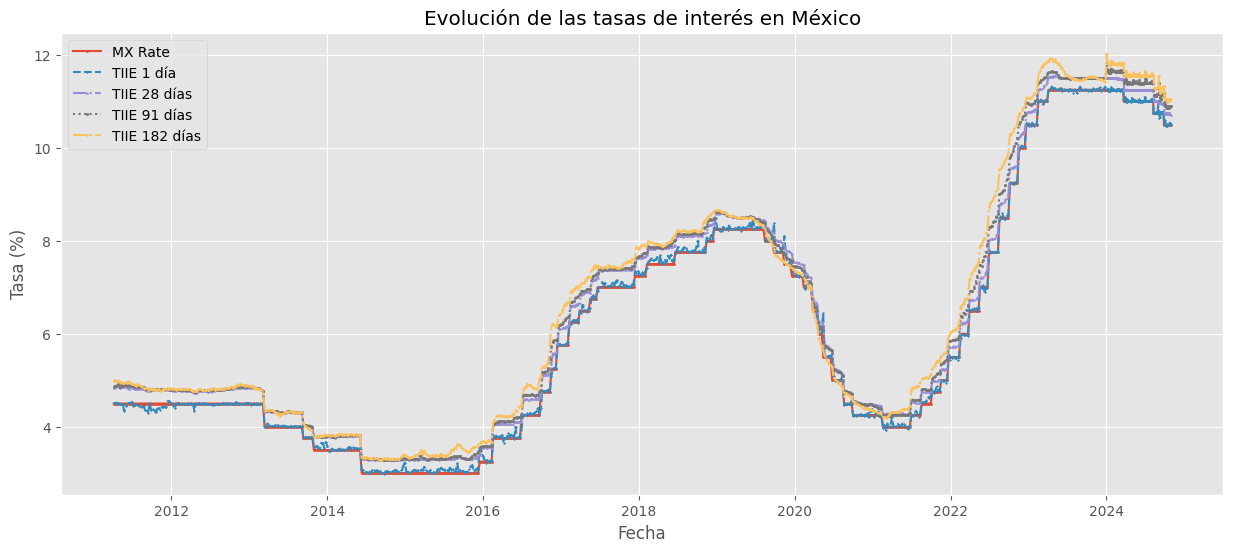

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Graficar cada una de las tasas de interés con marcadores más pequeños
plt.plot(df_tasas.index, df_tasas['MX_rate'], label='MX Rate', marker='o', linestyle='-', markersize=1)
plt.plot(df_tasas.index, df_tasas['TIIE_1'], label='TIIE 1 día', marker='x', linestyle='--', markersize=1)
plt.plot(df_tasas.index, df_tasas['TIIE_28'], label='TIIE 28 días', marker='^', linestyle='-.', markersize=1)
plt.plot(df_tasas.index, df_tasas['TIIE_91'], label='TIIE 91 días', marker='s', linestyle=':', markersize=1)
plt.plot(df_tasas.index, df_tasas['TIIE_182'], label='TIIE 182 días', marker='d', linestyle='-.', markersize=1)

# Configurar el título y etiquetas
plt.title('Evolución de las tasas de interés en México')
plt.xlabel('Fecha')
plt.ylabel('Tasa (%)')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

### **Análisis de gráficos**

**Tendencia general:**
- Las tasas de interés en México han mostrado fluctuaciones significativas en la última década. Observamos períodos de estabilidad, incrementos importantes y reducciones posteriores.

**Periodo de estabilidad (2011-2015):**
- Entre 2011 y 2015, las tasas de interés se mantuvieron relativamente estables, alrededor del 4% a 5%. Este período refleja un entorno macroeconómico estable con control sobre la inflación, lo que permitió que las tasas no variaran mucho.

**Incremento significativo (2015-2019):**
- A partir de 2016, hay un claro aumento en las tasas de interés, alcanzando un pico cercano al 8% en 2018. Este aumento podría estar relacionado con factores como un aumento en la inflación, ajustes en la política monetaria del Banco de México (Banxico) para controlar el crecimiento económico o influencias de la política monetaria global.

**Reducción gradual (2019-2021):**
A partir de 2019, se observa una reducción de las tasas de interés, que coinciden con la pandemia de COVID-19. Durante este tiempo, muchos bancos centrales, incluido Banxico, bajaron las tasas de interés para estimular la economía ante la desaceleración global y la contracción económica resultante.

**Aumento reciente (2022-2024):**
- En 2022, las tasas de interés comienzan a subir nuevamente, llegando a niveles superiores al 10% en 2023 y 2024. Este repunte podría estar relacionado con presiones inflacionarias post-pandemia y la necesidad de los bancos centrales de contener la inflación mediante el encarecimiento del crédito.

### **Inflación**

La inflación es el aumento generalizado y sostenido de los precios de bienes y servicios en una economía durante un periodo de tiempo. Cuando la inflación es alta, el poder adquisitivo de las personas disminuye, es decir, con el mismo monto de dinero se pueden comprar menos bienes o servicios. La inflación es uno de los indicadores macroeconómicos más vigilados, ya que afecta directamente la calidad de vida de los ciudadanos y el funcionamiento de la economía en general.

#### **Componentes de la inflación**

**Inflación General:**

Este es el índice que mide el aumento promedio en los precios de una canasta representativa de bienes y servicios. Es la cifra de inflación que se menciona más comúnmente en los medios y la que los bancos centrales, como el Banco de México, intentan controlar a través de la política monetaria.

**Inflación Subyacente (Core):**

La inflación subyacente excluye de su cálculo los precios de los bienes y servicios más volátiles, como los productos energéticos y los alimentos frescos, que suelen estar sujetos a fluctuaciones rápidas y pronunciadas. Esto la convierte en un indicador más estable y confiable para analizar la tendencia de la inflación en el mediano y largo plazo. Es un buen indicador de la inflación estructural que refleja el comportamiento subyacente de la economía.

**Inflación No Subyacente:**

La inflación no subyacente incluye los componentes más volátiles de la canasta, como los alimentos y la energía. Estos precios suelen estar más expuestos a factores externos, como cambios en los precios internacionales del petróleo o fenómenos climáticos, lo que los hace más impredecibles. Aunque esta medida es más volátil, también es importante, ya que tiene un impacto directo e inmediato en el costo de vida de las personas.

**Objetivo de Inflación:**

El objetivo de inflación es el valor que el Banco Central se propone alcanzar o mantener a lo largo del tiempo. Normalmente, un objetivo de inflación bajo y estable (como el 3% en México) es crucial para mantener la estabilidad económica, ya que promueve la inversión y el crecimiento sostenido.

In [ ]:
# Calcula el cambio porcentual anual de la inflación y la inflación subyacente
df_inflacion['Inflacion'] = df_inflacion['INPC'].pct_change(12) * 100
df_inflacion['Core'] = df_inflacion['Subyacente'].pct_change(12) * 100
df_inflacion['Inflacion_No_Subyacente'] = df_inflacion['No_Subyacente'].pct_change(12) * 100
# Calcula la diferencia entre la inflación y el target
df_inflacion['Inflacion_vs_target'] = df_inflacion['Inflacion'] - 3
# Indica si la inflación está dentro del rango objetivo (2% a 4%)
df_inflacion['inflation_in_target'] = np.where(df_inflacion['Inflacion'].between(2, 4), 1, 0)
# Agrega la columna del target de inflación
df_inflacion['Target_Inflacion'] = 3

In [ ]:
df_inflacion= df_inflacion.dropna()
df_inflacion

,INPC,Subyacente,No_Subyacente,Inflacion,Core,Inflacion_No_Subyacente,Inflacion_vs_target,inflation_in_target,Target_Inflacion
fecha,,,,,,,,,
1983-01-01,0.180355,0.195202,0.140326,110.042392,110.118298,109.811309,107.042392,0,3
1983-02-01,0.190034,0.207338,0.144135,112.947109,114.039579,109.498547,109.947109,0,3
1983-03-01,0.199232,0.217868,0.149997,115.388274,115.680995,114.443793,112.388274,0,3
1983-04-01,0.211846,0.230276,0.162604,117.251210,115.541578,122.864270,114.251210,0,3
1983-05-01,0.221034,0.240226,0.169739,114.610702,111.706956,124.385956,111.610702,0,3
...,...,...,...,...,...,...,...,...,...
2024-05-01,134.087000,134.035347,134.246403,4.686768,4.209430,6.187253,1.686768,0,3
2024-06-01,134.594000,134.329313,135.412467,4.976056,4.125101,7.673520,1.976056,0,3
2024-07-01,136.003000,134.753022,139.865906,5.566164,4.047225,10.361888,2.566164,0,3


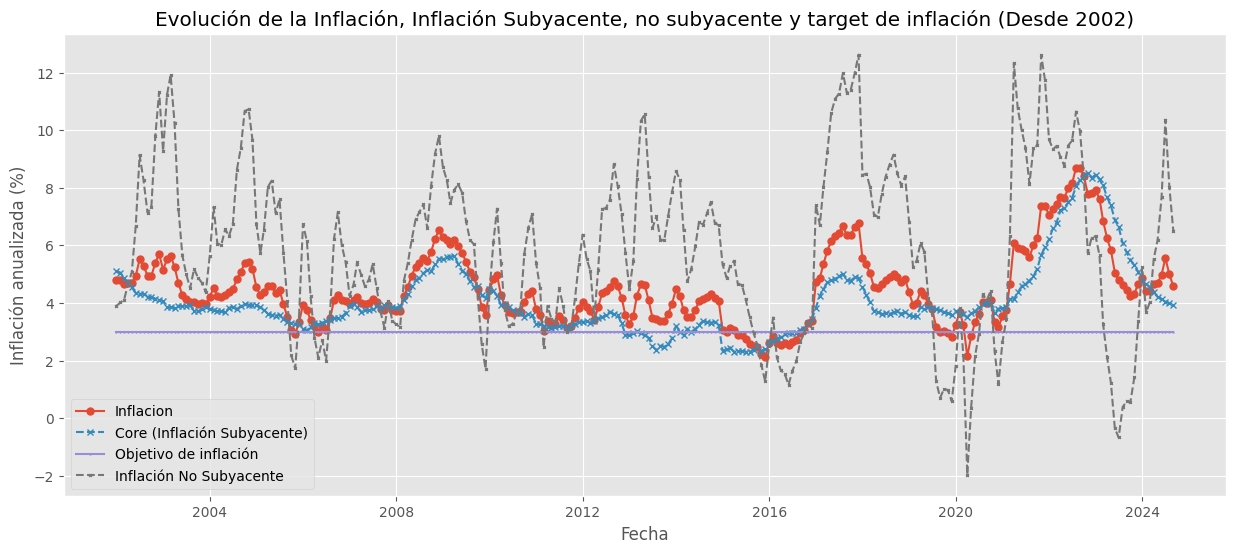

In [ ]:
# Filtrar los datos desde el año 2002
df_inflacion_filtrado = df_inflacion[df_inflacion.index >= '2002-01-01']

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 6))

# Graficar la serie de tiempo filtrada para cada componente
plt.plot(df_inflacion_filtrado.index,
         df_inflacion_filtrado['Inflacion'],
         label='Inflacion',
         marker='o',
         linestyle='-',
         markersize=5)
plt.plot(df_inflacion_filtrado.index, df_inflacion_filtrado['Core'], label='Core (Inflación Subyacente)', marker='x', linestyle='--', markersize=5)
plt.plot(df_inflacion_filtrado.index, df_inflacion_filtrado['Target_Inflacion'], label='Objetivo de inflación', marker='+', linestyle='-', markersize=2)
plt.plot(df_inflacion_filtrado.index, df_inflacion_filtrado['Inflacion_No_Subyacente'], label='Inflación No Subyacente', marker='x', linestyle='--', markersize=2)

# Configurar título, etiquetas y leyenda
plt.title('Evolución de la Inflación, Inflación Subyacente, no subyacente y target de inflación (Desde 2002)')
plt.xlabel('Fecha')
plt.ylabel('Inflación anualizada (%)')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()


#Interpretacion

El gráfico nos muestra  una persistente volatilidad en la inflación anualizada de México desde 2002, con la inflación no subyacente (altamente influenciada por factores volátiles como energéticos y alimentos) generando picos significativos que frecuentemente desvían la inflación general del objetivo del 3% de Banxico. Aunque la inflación subyacente (Core) muestra una tendencia más estable, también se ha mantenido por encima de la meta en periodos prolongados, especialmente a partir de 2021, sugiriendo que la dificultad para alcanzar el objetivo no solo reside en shocks externos (no subyacente) sino también en presiones más arraigadas en la economía, lo que se ve reflejado en los largos periodos donde la línea de inflación está visiblemente por encima de la línea del objetivo, indicando una lucha continua del banco central por anclar las expectativas.

In [ ]:
df_fix= df_fix.dropna()
df_fix

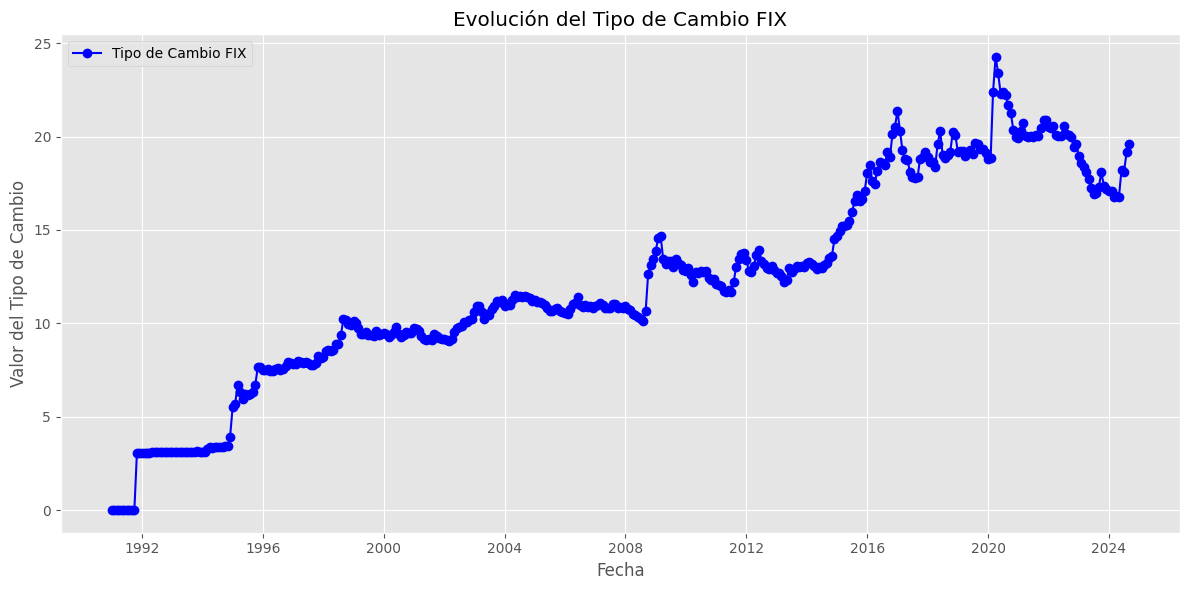

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Graficar la serie de tiempo para 'FIX'
plt.plot(df_fix.index,
         df_fix['FIX'],
         label='Tipo de Cambio FIX',
         color='blue',
         marker='o',
         linestyle='-')

# Configuración del título y las etiquetas
plt.title('Evolución del Tipo de Cambio FIX')
plt.xlabel('Fecha')
plt.ylabel('Valor del Tipo de Cambio')

# Mostrar la leyenda
plt.legend()

# Mejorar layout
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# IGAE y Crecimiento
# Fenera la variable crecimiento
df_igae['Crecimiento'] = df_igae['IGAE'].pct_change(12) * 100
df_igae= df_igae.dropna()
df_igae

,IGAE,Crecimiento
fecha,,
1994-01-01,58.7430,4.402489
1994-02-01,58.7240,1.746130
1994-03-01,59.1791,2.318187
1994-04-01,60.4367,5.688314
1994-05-01,60.3255,4.194878
...,...,...
2024-04-01,103.9250,0.866134
2024-05-01,104.7129,1.558395
2024-06-01,104.8834,1.276929


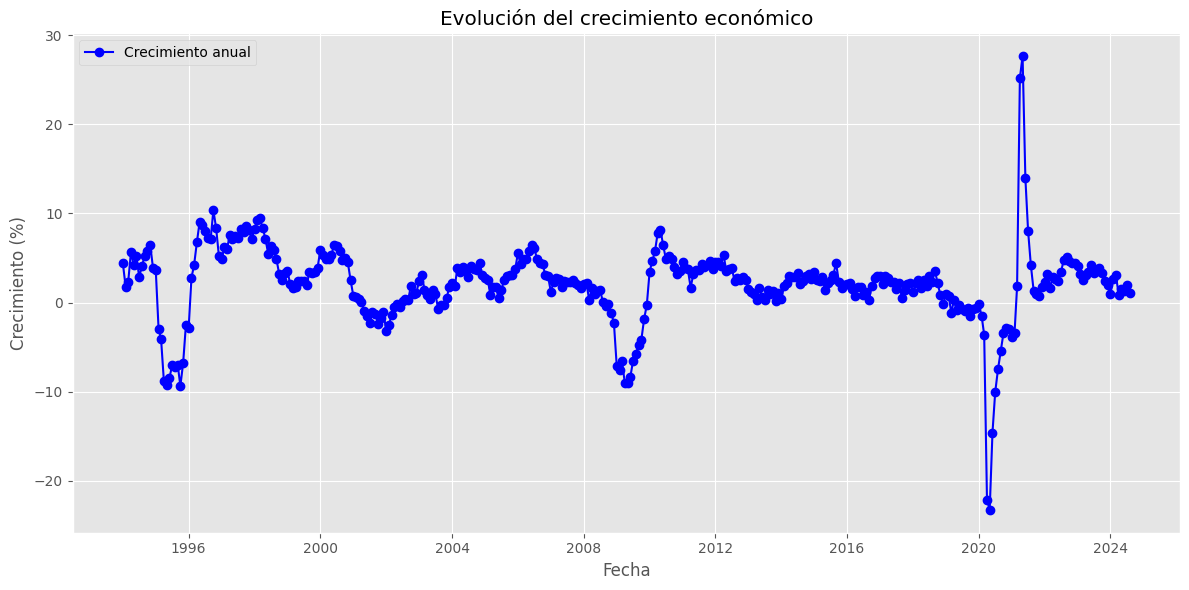

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Graficar la serie de tiempo para 'Crecimiento'
plt.plot(df_igae.index,
         df_igae['Crecimiento'],
         label='Crecimiento anual',
         color='blue',
         marker='o',
         linestyle='-')

# Configuración del título y las etiquetas
plt.title('Evolución del crecimiento económico')
plt.xlabel('Fecha')
plt.ylabel('Crecimiento (%)')

# Mostrar la leyenda
plt.legend()

# Mejorar layout
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# Definimos los tickers de los índices bursátiles
tickers = ['^MXX', '^GSPC', '^IXIC']  # ^MXX: IPC de México, ^GSPC: S&P 500, ^IXIC: NASDAQ

# Descargamos los datos de Yahoo Finance para los tres índices
data = yf.download(tickers, start="2000-01-01") #end="2024-01-01"

# Normalizamos los precios ajustados para que comiencen en 100 (número índice)
normalized_data = data['Adj Close'].div(data['Adj Close'].iloc[0]).mul(100)

# Creamos una figura de plotly
fig = go.Figure()

# Añadimos una línea por cada índice
for ticker in tickers:
    fig.add_trace(go.Scatter(x=normalized_data.index, y=normalized_data[ticker], mode='lines', name=ticker))

# Configuramos el título y las etiquetas del gráfico
fig.update_layout(
    title="Precios de Cierre Ajustados Normalizados (Número Índice)",
    xaxis_title="Fecha",
    yaxis_title="Número Índice (Base 100)",
    legend_title="Índice",
    template="plotly_white",
    hovermode="x unified"
)

# Mostramos el gráfico
fig.show()

[*********************100%***********************]  3 of 3 completed


#Interpretacion

Este gráfico de precios de cierre ajustados, normalizados a un índice base 100, nos muestra la fuerte correlación y el comportamiento sincronizado de los principales índices bursátiles (^MXX para México, ^GSPC y ^IXIC para EE.UU.) a lo largo del tiempo. Se observa una clara tendencia alcista de largo plazo en todos ellos, con recuperaciones notables tras caídas significativas (como la crisis de 2008-2009 y la de 2020), lo que evidencia la resiliencia y el crecimiento general de los mercados de capitales, así como su respuesta conjunta a eventos macroeconómicos globales.

In [ ]:
data

Price                        Adj Close                              \
Ticker                           ^GSPC         ^IXIC          ^MXX   
Date                                                                 
2000-01-03 00:00:00+00:00  1455.219971   4131.149902   7077.709961   
2000-01-04 00:00:00+00:00  1399.420044   3901.689941   6675.270020   
2000-01-05 00:00:00+00:00  1402.109985   3877.540039   6764.310059   
2000-01-06 00:00:00+00:00  1403.449951   3727.129883   6751.649902   
2000-01-07 00:00:00+00:00  1441.469971   3882.620117   7047.089844   
...                                ...           ...           ...   
2024-10-23 00:00:00+00:00  5797.419922  18276.650391  52142.128906   
2024-10-24 00:00:00+00:00  5809.859863  18415.490234  51795.558594   
2024-10-25 00:00:00+00:00  5808.120117  18518.609375  51784.328125   
2024-10-28 00:00:00+00:00  5823.520020  18567.189453  51816.300781   
2024-10-29 00:00:00+00:00  5831.319824  18646.908203  51496.949219   

Price                            Close                              \
Ticker                           ^GSPC         ^IXIC          ^MXX   
Date                                                                 
2000-01-03 00:00:00+00:00  1455.219971   4131.149902   7077.709961   
2000-01-04 00:00:00+00:00  1399.420044   3901.689941   6675.270020   
2000-01-05 00:00:00+00:00  1402.109985   3877.540039   6764.310059   
2000-01-06 00:00:00+00:00  1403.449951   3727.129883   6751.649902   
2000-01-07 00:00:00+00:00  1441.469971   3882.620117   7047.089844   
...                                ...           ...           ...   
2024-10-23 00:00:00+00:00  5797.419922  18276.650391  52142.128906   
2024-10-24 00:00:00+00:00  5809.859863  18415.490234  51795.558594   
2024-10-25 00:00:00+00:00  5808.120117  18518.609375  51784.328125   
2024-10-28 00:00:00+00:00  5823.520020  18567.189453  51816.300781   
2024-10-29 00:00:00+00:00  5831.319824  18646.908203  51496.949219   

Price                             High                              \
Ticker                           ^GSPC         ^IXIC          ^MXX   
Date                                                                 
2000-01-03 00:00:00+00:00  1478.000000   4192.189941   7278.770020   
2000-01-04 00:00:00+00:00  1455.219971   4073.250000   7074.709961   
2000-01-05 00:00:00+00:00  1413.270020   3924.209961   6781.029785   
2000-01-06 00:00:00+00:00  1411.900024   3868.760010   6822.459961   
2000-01-07 00:00:00+00:00  1441.469971   3882.669922   7054.290039   
...                                ...           ...           ...   
2024-10-23 00:00:00+00:00  5834.850098  18509.189453  52506.679688   
2024-10-24 00:00:00+00:00  5817.799805  18435.369141  52421.648438   
2024-10-25 00:00:00+00:00  5862.819824  18690.009766  52221.660156   
2024-10-28 00:00:00+00:00  5842.919922  18671.009766  51890.218750   
2024-10-29 00:00:00+00:00  5835.959961  18649.468750  51911.308594   

Price                              Low                              \
Ticker                           ^GSPC         ^IXIC          ^MXX   
Date                                                                 
2000-01-03 00:00:00+00:00  1438.359985   3989.709961   7059.450195   
2000-01-04 00:00:00+00:00  1397.430054   3898.229980   6673.359863   
2000-01-05 00:00:00+00:00  1377.680054   3734.870117   6524.279785   
2000-01-06 00:00:00+00:00  1392.099976   3715.620117   6742.910156   
2000-01-07 00:00:00+00:00  1400.729980   3711.090088   6768.859863   
...                                ...           ...           ...   
2024-10-23 00:00:00+00:00  5762.410156  18146.609375  51878.570312   
2024-10-24 00:00:00+00:00  5784.919922  18305.419922  51543.171875   
2024-10-25 00:00:00+00:00  5799.979980  18487.060547  51743.289062   
2024-10-28 00:00:00+00:00  5823.080078  18563.019531  51457.531250   
2024-10-29 00:00:00+00:00  5802.169922  18509.593750  51362.898438   

Price                             Open                              \
Ticker

In [ ]:
# Primero, quitar la zona horaria del índice de fechas de los datos de cierre ajustados
data.index = data.index.tz_localize(None)

# Renombramos las columnas de 'Adj Close' con los nombres de los índices
indices = data['Adj Close'].rename(columns={'^MXX': 'IPC', '^GSPC': 'SP500', '^IXIC': 'NASDAQ'})
indices


Ticker,SP500,NASDAQ,IPC
Date,,,
2000-01-03,1455.219971,4131.149902,7077.709961
2000-01-04,1399.420044,3901.689941,6675.270020
2000-01-05,1402.109985,3877.540039,6764.310059
2000-01-06,1403.449951,3727.129883,6751.649902
2000-01-07,1441.469971,3882.620117,7047.089844
...,...,...,...
2024-10-23,5797.419922,18276.650391,52142.128906
2024-10-24,5809.859863,18415.490234,51795.558594
2024-10-25,5808.120117,18518.609375,51784.328125


Utilizamos pd.merge() para combinar las bases de datos usando el índice como clave (left_index=True, right_index=True) y el método de combinación how='outer' para conservar todas las fechas, llenando con NaN cuando no hay datos correspondientes.

In [ ]:
# Merge con df_inflacion
final = pd.merge(indices, df_inflacion, left_index=True, right_index=True, how='outer')

# Merge con df_igae
final = pd.merge(final, df_igae, left_index=True, right_index=True, how='outer')

# Merge con df_fix
final = pd.merge(final, df_fix, left_index=True, right_index=True, how='outer')

# Merge con df_tasas
#final = pd.merge(final, df_tasas, left_index=True, right_index=True, how='outer')

# Eliminamos filas con valores NaN
final = final.dropna()

# Mostramos las primeras filas del DataFrame final
print(final.tail())

                  SP500        NASDAQ           IPC     INPC  Subyacente  \
2024-02-01  4906.189941  15361.639648  57828.078125  133.681  132.945408   
2024-03-01  5137.080078  16274.940430  55536.320312  134.065  133.524017   
2024-04-01  5243.770020  16396.830078  57653.230469  134.336  133.803032   
2024-07-01  5475.089844  17879.300781  52883.968750  136.003  134.753022   
2024-08-01  5446.680176  17194.150391  52417.480469  136.013  135.053143   

            No_Subyacente  Inflacion      Core  Inflacion_No_Subyacente  \
2024-02-01     135.954343   4.400762  4.643099                 3.673864   
2024-03-01     135.738363   4.420939  4.550556                 4.029858   
2024-04-01     135.983390   4.653210  4.365478                 5.537133   
2024-07-01     139.865906   5.566164  4.047225                10.361888   
2024-08-01     138.886021   4.992860  3.996011                 8.030988   

            Inflacion_vs_target  inflation_in_target  Target_Inflacion  \
2024-02-01        

In [ ]:
final

,SP500,NASDAQ,IPC,INPC,Subyacente,No_Subyacente,Inflacion,Core,Inflacion_No_Subyacente,Inflacion_vs_target,inflation_in_target,Target_Inflacion,IGAE,Crecimiento,FIX
2000-02-01,1409.280029,4051.979980,6740.520020,45.329380,49.507968,34.089599,10.522686,12.357815,5.507886,7.522686,0.0,3.0,73.1467,5.314179,9.4252
2000-03-01,1379.189941,4784.080078,7614.830078,45.580681,49.828171,34.186920,10.112402,11.328538,6.707543,7.112402,0.0,3.0,73.1090,4.896831,9.2876
2000-06-01,1448.810059,3582.500000,6178.060059,46.283920,50.477976,34.952919,9.413062,9.524137,9.092188,6.413062,0.0,3.0,74.3386,6.490392,9.8295
2000-08-01,1438.099976,3685.520020,6507.770020,46.719785,50.857468,35.474187,9.104194,8.801118,9.983913,6.104194,0.0,3.0,74.3287,5.824507,9.2709
2000-09-01,1520.770020,4234.330078,6722.410156,47.061072,51.249209,35.692746,8.849433,8.319437,10.403189,5.849433,0.0,3.0,74.3437,4.820310,9.3540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,4906.189941,15361.639648,57828.078125,133.681000,132.945408,135.954343,4.400762,4.643099,3.673864,1.400762,0.0,3.0,104.5760,2.610194,17.0898
2024-03-01,5137.080078,16274.940430,55536.320312,134.065000,133.524017,135.738363,4.420939,4.550556,4.029858,1.420939,0.0,3.0,104.6174,3.128737,16.7918
2024-04-01,5243.770020,16396.830078,57653.230469,134.336000,133.803032,135.983390,4.653210,4.365478,5.537133,1.653210,0.0,3.0,103.9250,0.866134,16.8104
2024-07-01,5475.089844,17879.300781,52883.968750,136.003000,134.753022,139.865906,5.566164,4.047225,10.361888,2.566164,0.0,3.0,105.5011,1.992162,18.1117


In [ ]:
# Guardamos el DataFrame final en un archivo CSV
final.to_csv('base_final.csv')

# Mensaje para indicar que el archivo CSV ha sido guardado exitosamente
print("Archivo CSV 'base_final.csv' guardado con éxito.")

Archivo CSV 'base_final.csv' guardado con éxito.


### **Estadística descriptiva**

La estadística descriptiva **permite conocer los aspectos básicos de nuestras variables**, específicamente:

*   Número de observaciones (count).
*   Media (mean).
*   Desviación estándar (std).
*   Dato máximo de la muestra (max).
*   Dato mínimo de la muestra (min).
*   Quartiles ordenados de menor a mayor (25%, 50%, 75%).

In [ ]:
final.describe()

,SP500,NASDAQ,IPC,INPC,Subyacente,No_Subyacente,Inflacion,Core,Inflacion_No_Subyacente,Inflacion_vs_target,inflation_in_target,Target_Inflacion,IGAE,Crecimiento,FIX
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.0,166.000000,166.000000,166.000000
mean,2118.580723,5494.021406,33172.451663,82.905213,85.072991,76.894717,4.781145,4.419782,5.989604,1.781145,0.349398,3.0,88.148183,1.651694,14.577381
std,1226.344797,4441.839783,16244.763177,25.253421,23.352670,30.686158,1.655440,1.707688,2.938670,1.655440,0.478222,0.0,10.163872,3.656556,4.049078
min,811.080017,1213.719971,5385.500000,45.329380,49.507968,34.089599,2.130813,2.308155,-1.964219,-0.869187,0.000000,3.0,71.773800,-22.107889,9.070700
25%,1204.832520,2178.472595,19076.212891,60.656338,64.168103,50.070731,3.626555,3.383429,4.021961,0.626555,0.000000,3.0,78.714650,0.757051,11.018450
50%,1510.804993,3286.279907,37382.773438,78.524851,81.935968,69.435246,4.393218,3.868489,5.864235,1.393218,0.000000,3.0,88.056550,2.205289,13.057650
75%,2787.859985,7524.262573,45989.313477,102.087250,101.046984,102.889998,5.419279,4.879813,8.035287,2.419279,1.000000,3.0,97.497325,3.523396,18.650975
max,5475.089844,17879.300781,57828.078125,136.013000,135.053143,139.865906,10.522686,12.357815,12.621132,7.522686,1.000000,3.0,105.501100,13.945271,24.265800


In [ ]:
df_inflacion.describe()

,INPC,Subyacente,No_Subyacente,Inflacion,Core,Inflacion_No_Subyacente,Inflacion_vs_target,inflation_in_target,Target_Inflacion
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.0
mean,54.126098,55.934163,49.138621,21.800082,21.546123,22.666385,18.800082,0.209581,3.0
std,39.462209,39.384184,40.068096,33.568978,33.559331,33.923941,33.568978,0.407416,0.0
min,0.180355,0.195202,0.140326,2.130813,2.299474,-1.964219,-0.869187,0.000000,3.0
25%,13.385797,14.653341,10.043304,4.179852,3.729408,5.252954,1.179852,0.000000,3.0
50%,55.192542,59.233100,44.020213,6.232857,5.640708,8.147277,3.232857,0.000000,3.0
75%,84.733157,86.830087,78.952555,19.720737,19.794303,21.941184,16.720737,0.000000,3.0
max,136.080000,135.433359,139.865906,179.731978,176.850614,201.289770,176.731978,1.000000,3.0


#### **Interpretación de los percentiles**

Un percentil es una medida estadística que indica el valor por debajo del cual cae un cierto porcentaje de observaciones en un grupo de observaciones. Los percentiles dividen el conjunto de datos en cien partes iguales, y se utilizan ampliamente para entender y analizar la distribución de los datos.

Cómo se entiende un percentil
- El percentil 50, por ejemplo, es el valor medio de un conjunto de datos y se conoce comúnmente como la mediana. El 50% de los datos se encuentran por debajo de este valor.
- El percentil 25 (también conocido como el primer cuartil) indica que el 25% de los datos son menores que ese valor, mientras que el 75% son mayores.
- El percentil 75 (tercer cuartil) muestra que el 75% de los datos son menores que ese valor y el 25% son mayores.


Los percentiles son especialmente útiles para:

- Describir la distribución de los datos: Ayudan a comprender la dispersión y la forma de la distribución de un conjunto de datos.
- Identificar valores atípicos: Al comparar los valores extremos con los percentiles específicos, se pueden identificar los datos que son inusualmente altos o bajos.
- Comparar diferentes conjuntos de datos: Al observar los percentiles de diferentes grupos, se pueden hacer comparaciones estandarizadas, incluso si las distribuciones de los datos son diferentes.
- Establecer benchmarks y estándares: En algunos campos, como en la administración de riesgos, los percentiles se usan para establecer los valores de pérdida de portafolios de inversión.

### **Box plot**

Un diagrama de caja (box plot en inglés) es una herramienta gráfica que se utiliza para visualizar la distribución de un conjunto de datos y proporciona información sobre la mediana, el rango intercuartil (IQR, por sus siglas en inglés), los valores atípicos y la dispersión general de los datos.

  * **Mediana (línea en el centro):** La línea que divide la caja en dos partes representa la mediana de los datos, que es el valor que se encuentra en el punto medio de la distribución. Es útil para identificar la tendencia central de los datos.
  * **Caja (intercuartiles):** La caja muestra el rango intercuartil (IQR), que se extiende desde el primer cuartil (Q1) hasta el tercer cuartil (Q3). El IQR es la distancia entre el percentil 25 (Q1) y el percentil 75 (Q3) de los datos. La caja encierra el 50% central de los datos y proporciona una medida de la dispersión de estos datos.
  * **Bigotes (*whiskers*):** Los bigotes se extienden desde la caja hasta los valores extremos, pero no más allá de 1.5 veces el IQR desde la caja. Los valores que están más allá de estos límites se consideran valores atípicos y se representan individualmente.
  * **Valores Atípicos (puntos individuales):** Los puntos que se encuentran más allá de los bigotes se consideran valores atípicos y se muestran como puntos individuales en el gráfico. Estos valores suelen ser puntos de datos inusuales o extremos en la distribución.

### **Histograma**

Un histograma **es un gráfico que muestra la distribución de frecuencia** (o forma) de un conjunto de datos continuos. Los elementos de un histograma son:

* **Eje X (Horizontal):** En el eje X del histograma se encuentran los valores numéricos que se están representando. Estos valores se dividen en intervalos o "bins" (contenedores) que cubren rangos específicos. Cada bin representa un rango de valores, y el eje X muestra estos rangos.

* **Eje Y (Vertical):** En el eje Y se representa la frecuencia o la cantidad de observaciones que caen en cada bin.

* **Bins (Contenedores):** Los bins son intervalos o rangos en los que se dividen los datos en el eje X. Cada bin tiene un ancho específico y contiene los valores que caen dentro de ese rango. La altura de cada barra en el histograma (en el eje Y) representa la cantidad de observaciones que caen en ese bin.

* **Barra del Histograma:** Cada bin se representa como una barra vertical en el histograma. La altura de la barra indica la frecuencia o el número de observaciones que caen en ese bin. Cuanto más alta sea la barra, mayor será la frecuencia en ese rango de valores.

* **Distribución de Datos:** El histograma muestra cómo se distribuyen los datos a lo largo de los diferentes rangos. Puede revelar patrones como la simetría o asimetría de la distribución, la concentración de valores en ciertos rangos y la dispersión de los datos.

* **Forma de la Distribución:** La forma general del histograma puede proporcionar información sobre la distribución de los datos. Por ejemplo:

  * Una distribución normal tiene una forma de campana.
  * Una distribución sesgada hacia la derecha tiene una cola derecha más larga.
  * Una distribución sesgada hacia la izquierda tiene una cola izquierda más larga.


SP500
Sesgo : 1.11


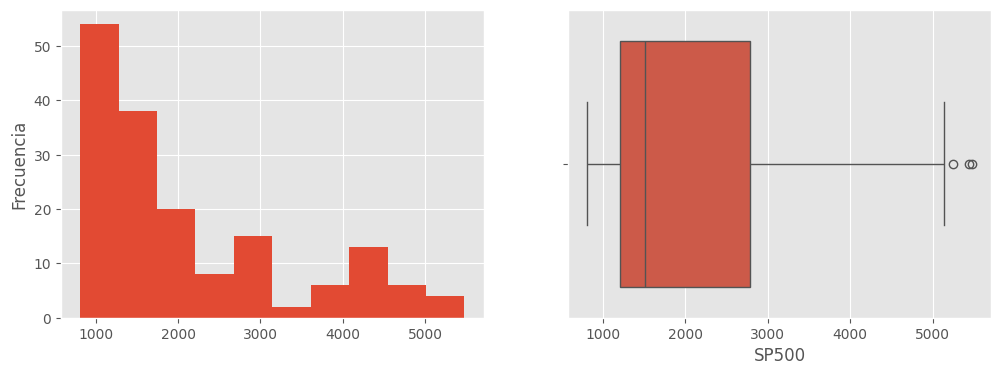

NASDAQ
Sesgo : 1.2


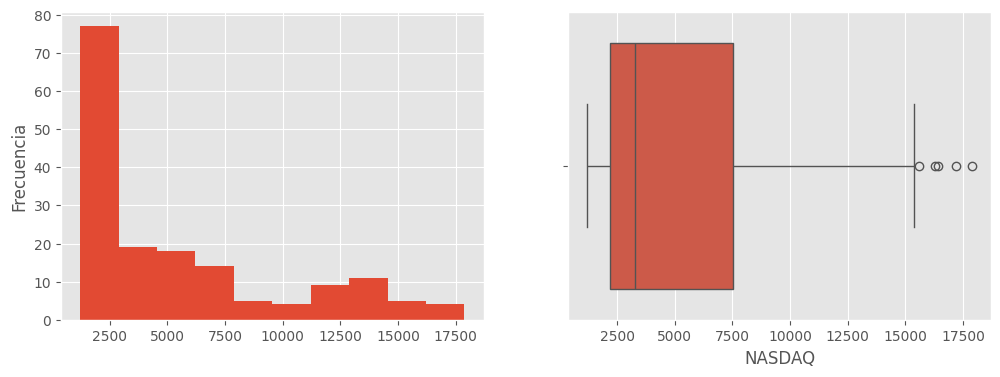

IPC
Sesgo : -0.47


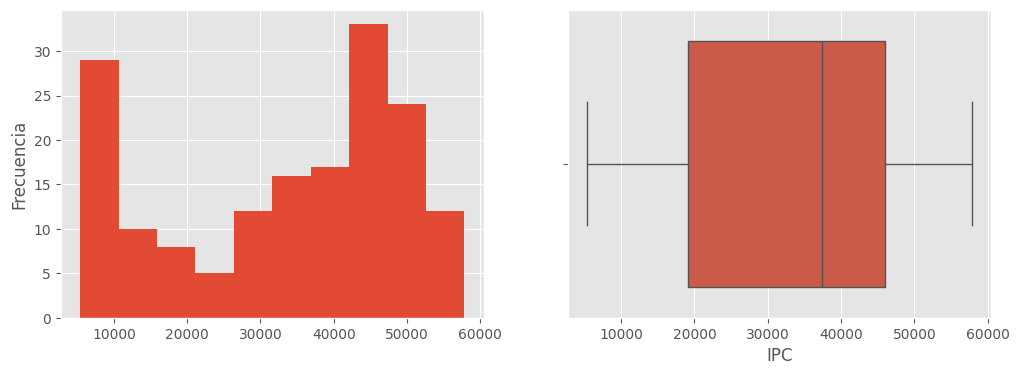

INPC
Sesgo : 0.45


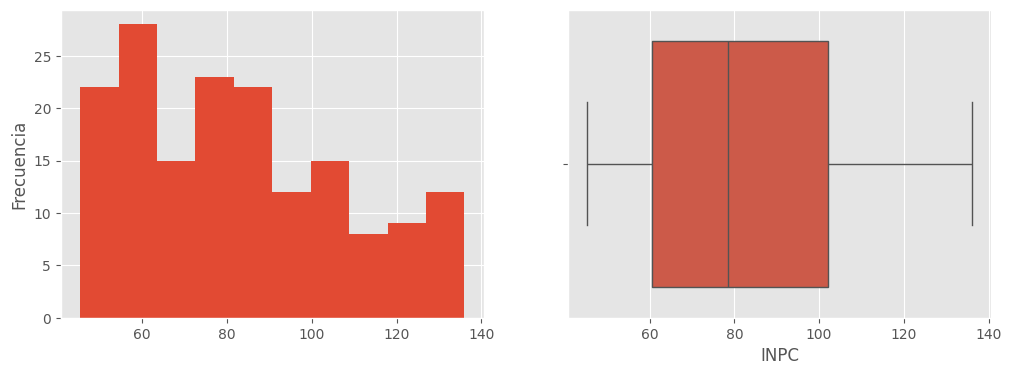

Subyacente
Sesgo : 0.46


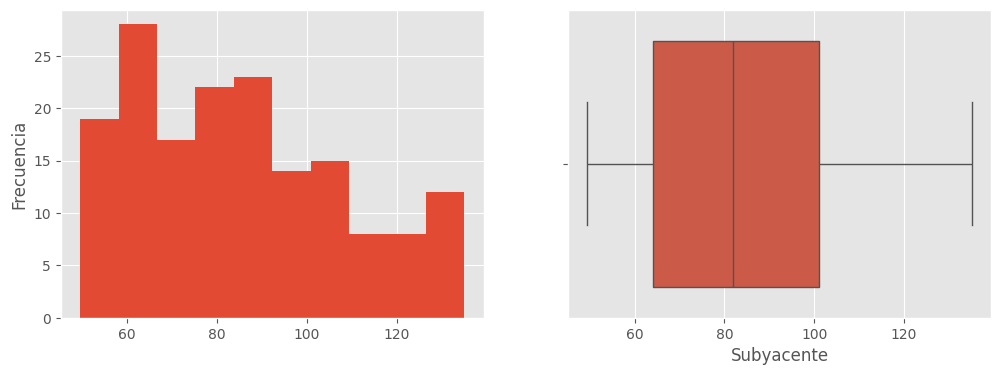

No_Subyacente
Sesgo : 0.47


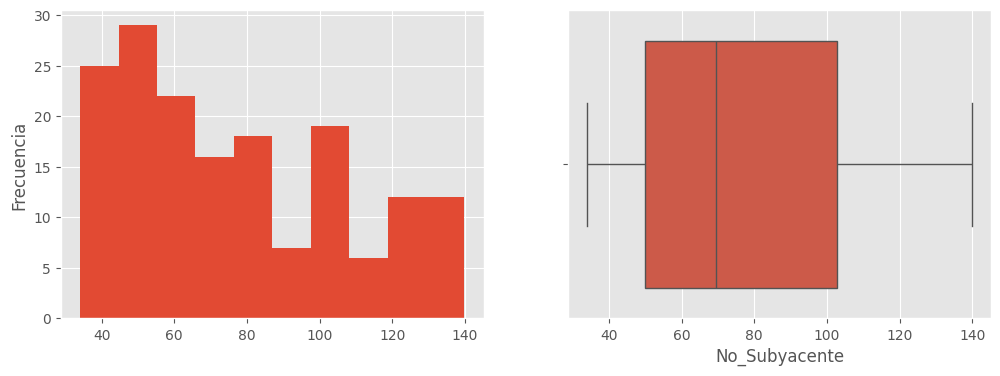

Inflacion
Sesgo : 1.17


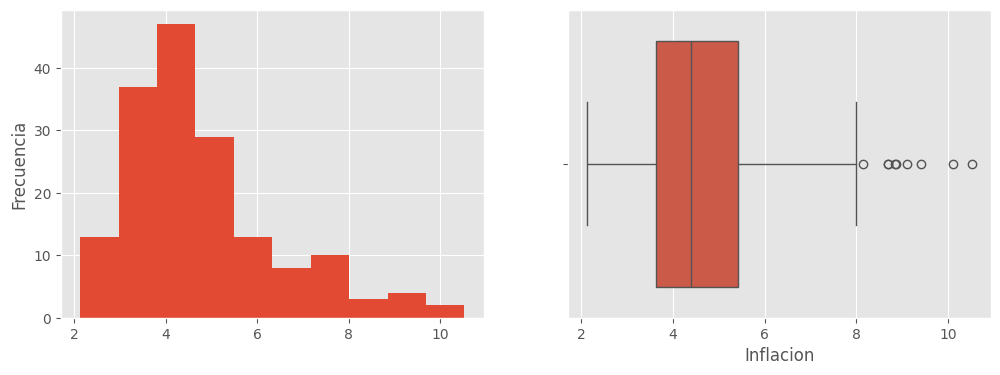

Core
Sesgo : 1.88


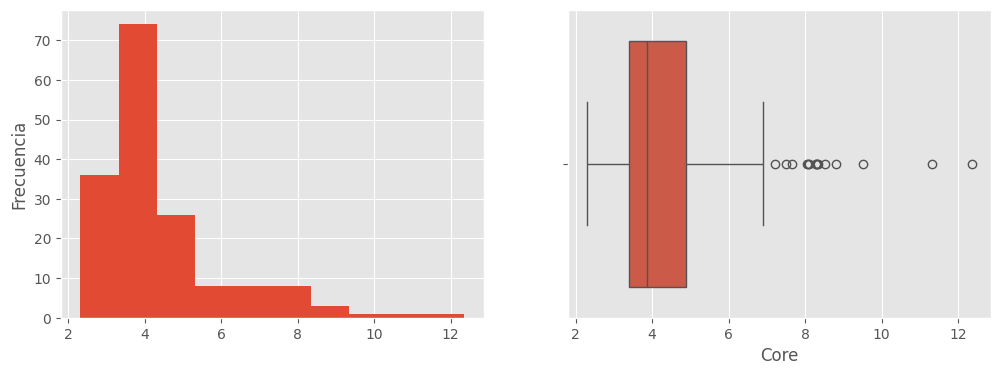

Inflacion_No_Subyacente
Sesgo : 0.06


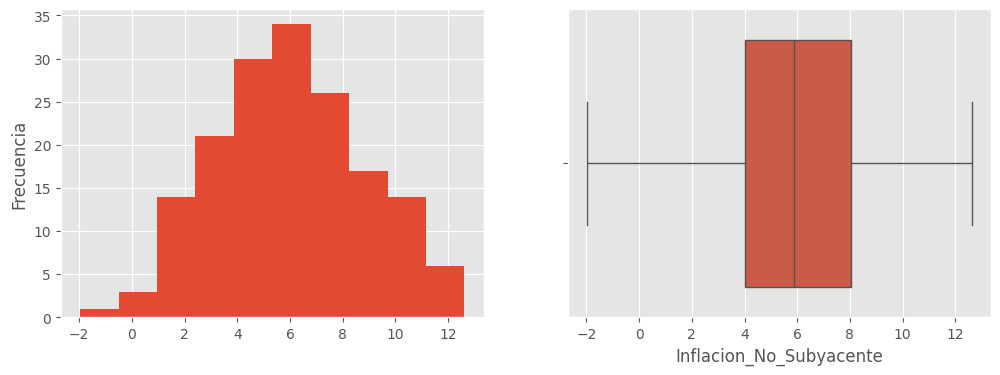

Inflacion_vs_target
Sesgo : 1.17


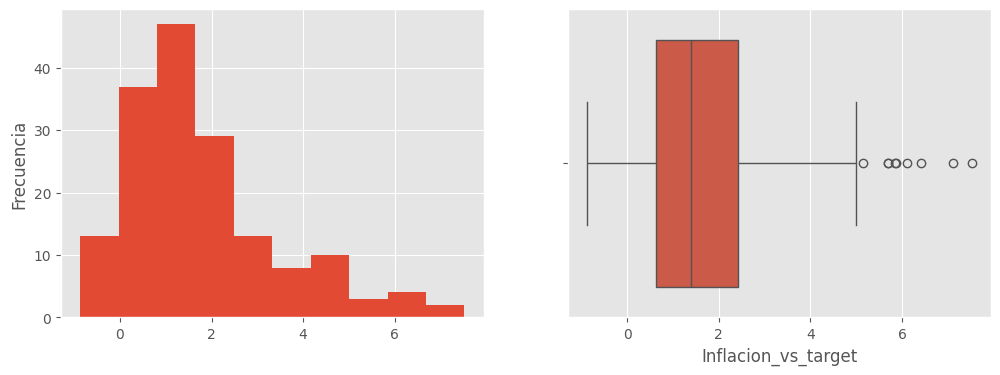

inflation_in_target
Sesgo : 0.64


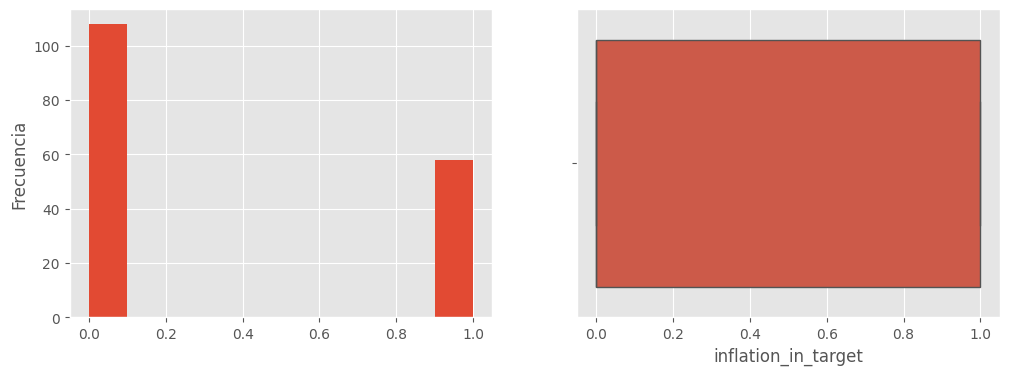

Target_Inflacion
Sesgo : 0.0


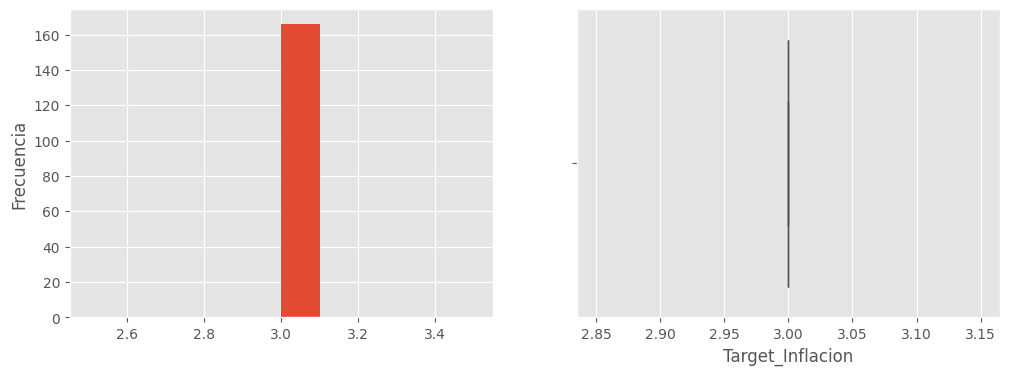

IGAE
Sesgo : -0.02


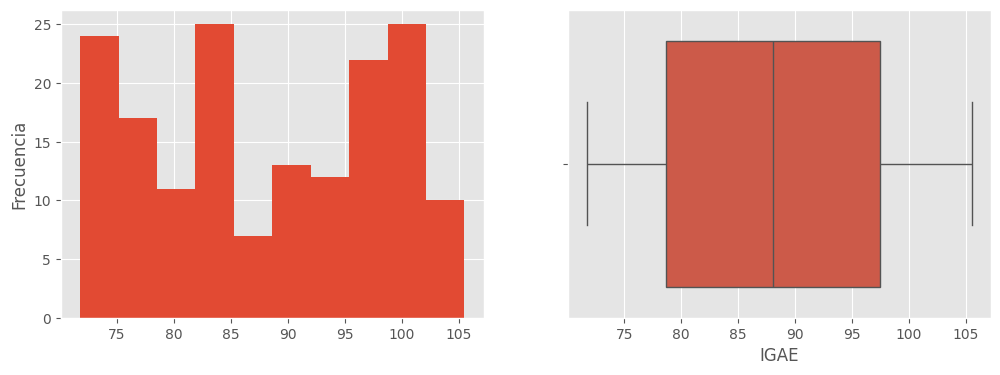

Crecimiento
Sesgo : -2.54


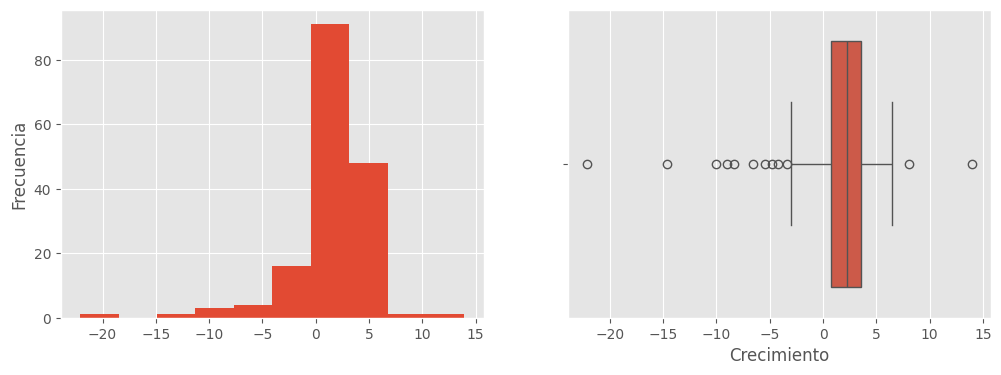

FIX
Sesgo : 0.37


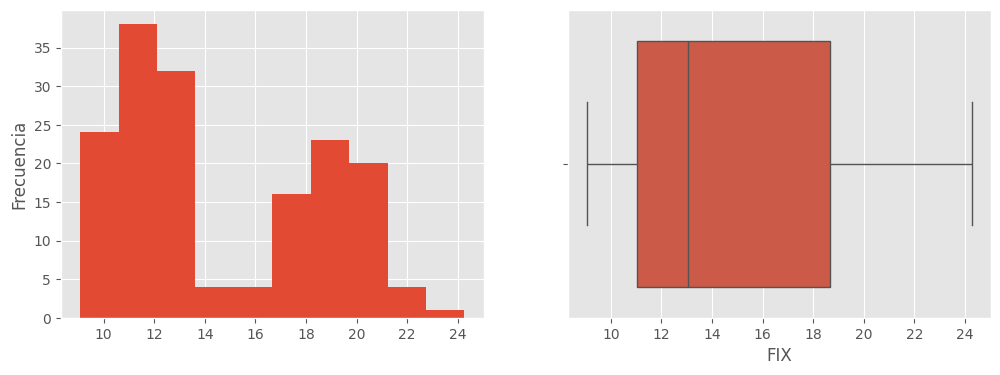

In [ ]:
num_cols = final.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    print(col)
    print('Sesgo :', round(final[col].skew(), 2))
    plt.figure(figsize = (12, 4))
    plt.subplot(1, 2, 1)
    final[col].hist(grid=True)
    plt.ylabel('Frecuencia')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=final[col])
    plt.show()

### **Matriz de Correlación**

La correlación es una medida estadística que describe la relación entre dos variables.

La fórmula para calcular el coeficiente de correlación de Pearson ($\rho$) entre dos variables X e Y se expresa como:

$$\rho = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \sum{(Y_i - \bar{Y})^2}}}$$

Donde:

* $X_i$ y $Y_i$ son los valores individuales de las variables X e Y.
* $\bar{X}$ y $\bar{Y}$son las medias (promedios) de las variables X e Y, respectivamente.

Esta fórmula calcula el coeficiente de correlación de Pearson y se basa en la covarianza entre X e Y y sus respectivas desviaciones estándar.

La correlación se utiliza para entender cómo se mueven dos activos o variables en relación entre sí. Los niveles de correlación pueden variar entre -1 y 1, y se interpretan de la siguiente manera:

* **Correlación Positiva** ($\rho > 0$): Cuando dos variables tienen una correlación positiva, significa que tienden a moverse en la misma dirección. Si una variable aumenta, la otra también tiende a aumentar. El valor 1 representa una correlación perfecta positiva, lo que significa que dos variables están perfectamente relacionadas y siempre se mueven juntas en la misma dirección.

* **Correlación Negativa** ($\rho < 0$): Cuando dos variables tienen una correlación negativa, significa que tienden a moverse en direcciones opuestas. Si una variable aumenta, la otra tiende a disminuir y viceversa. El valor -1 representa una correlación perfecta negativa, lo que significa que dos variables están perfectamente relacionadas pero siempre se mueven en direcciones opuestas.

* **Correlación Nula** ($\rho = 0$): Cuando la correlación entre dos variables es cero o cercana a cero, significa que no hay una relación lineal aparente entre ellas. En otras palabras, los movimientos en una variable no están relacionados con los movimientos en la otra variable.

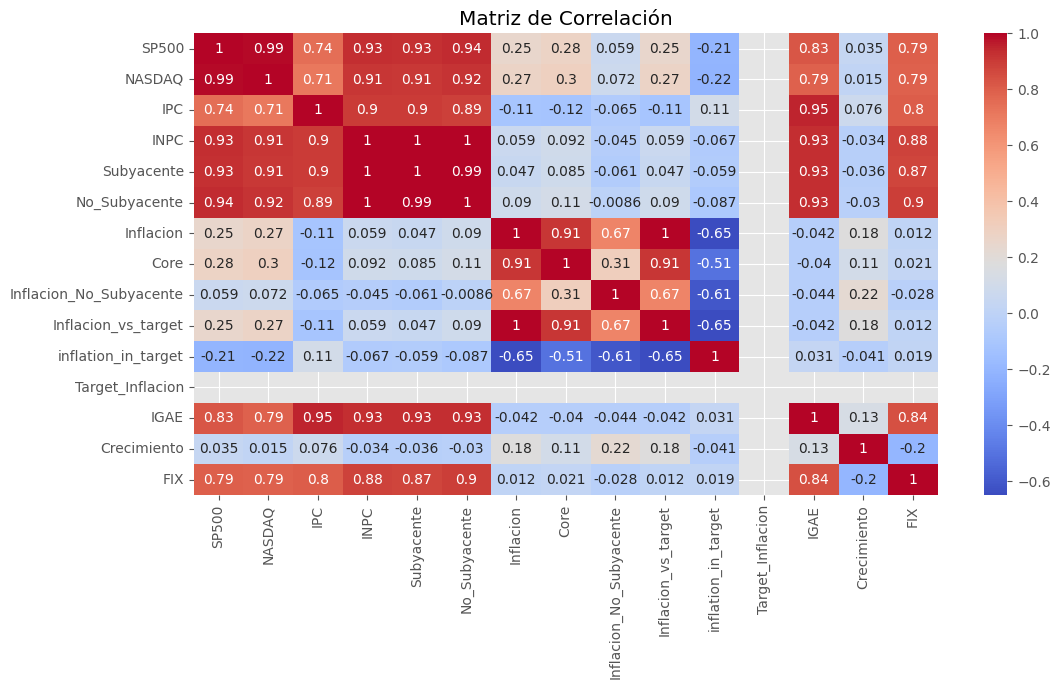

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(final.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

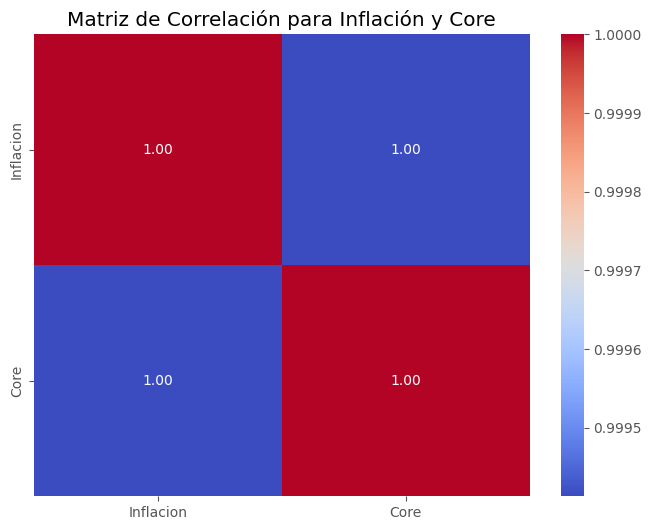

In [ ]:
# Calcular la matriz de correlación solo para 'Inflacion' y 'Core_'
correlacion = df_inflacion[['Inflacion', 'Core']].corr()

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Inflación y Core')
plt.show()

#INTERPRETACION

La matriz de correlación muestra cómo se relacionan distintos indicadores económicos y financieros entre sí. Se observa que los mercados bursátiles como el SP500, NASDAQ e IPC están fuertemente conectados, moviéndose casi en sincronía, al igual que los distintos tipos de inflación (general, subyacente y no subyacente), lo cual indica que suelen subir y bajar juntos. También se destaca que cuando la inflación es alta, es menos probable que se encuentre dentro del objetivo establecido por el banco central, lo que se refleja en las correlaciones negativas con ese indicador. La actividad económica (IGAE) tiene una fuerte relación con los precios y el mercado financiero, mientras que el crecimiento económico parece comportarse de manera más independiente. Finalmente, el tipo de cambio (FIX) está más alineado con los mercados financieros que con la inflación o el crecimiento, sugiriendo que responde más a factores externos o financieros que a los internos de la economía real.